In [1]:
import pandas as pd
#df1 = df_final_demo
df_final_demo = pd.read_csv('df_final_demo.txt')
df_final_experiment_clients = pd.read_csv('df_final_experiment_clients.txt')
df_final_web_data_pt_1 = pd.read_csv('df_final_web_data_pt_1.txt')
df_final_web_data_pt_2 = pd.read_csv('df_final_web_data_pt_2.txt')

In [2]:
df_final_web_data_pt_1['process_step'].unique()

array(['step_3', 'step_2', 'step_1', 'start', 'confirm'], dtype=object)

In [3]:
df_final_demo.shape

(70609, 9)

In [4]:
df_final_demo.columns


Index(['client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth'],
      dtype='object')

In [5]:
df_final_demo.nunique()


client_id           70609
clnt_tenure_yr         54
clnt_tenure_mnth      482
clnt_age              165
gendr                   4
num_accts               8
bal                 70333
calls_6_mnth            8
logons_6_mnth           9
dtype: int64

In [6]:
df_final_demo.isnull().value_counts()

client_id  clnt_tenure_yr  clnt_tenure_mnth  clnt_age  gendr  num_accts  bal    calls_6_mnth  logons_6_mnth
False      False           False             False     False  False      False  False         False            70594
           True            True              True      True   True       True   True          True                14
           False           False             True      False  False      False  False         False                1
Name: count, dtype: int64

In [7]:
df_final_experiment_clients.head()

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control


In [8]:
df_final_experiment_clients['client_id'].nunique()

70609

In [9]:
df_final_demo['client_id'].nunique()

70609

In [10]:
df_final_web_data_pt_1['client_id'].nunique()

58391

In [11]:
df_final_web_data_pt_2['client_id'].nunique()

67430

In [12]:
df_merge = pd.concat([df_final_web_data_pt_1, df_final_web_data_pt_2], axis = 0)

In [13]:
df_merge.dtypes

client_id        int64
visitor_id      object
visit_id        object
process_step    object
date_time       object
dtype: object

In [14]:
df_merge["date_time"] =  pd.to_datetime(df_merge["date_time"])

In [15]:
df_merge.dtypes

client_id                int64
visitor_id              object
visit_id                object
process_step            object
date_time       datetime64[ns]
dtype: object

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



In [17]:
df_merge.count()

client_id       755405
visitor_id      755405
visit_id        755405
process_step    755405
date_time       755405
dtype: int64

In [18]:
df_merge["process_step"].value_counts()

process_step
start      243945
step_1     163193
step_2     133062
step_3     112242
confirm    102963
Name: count, dtype: int64

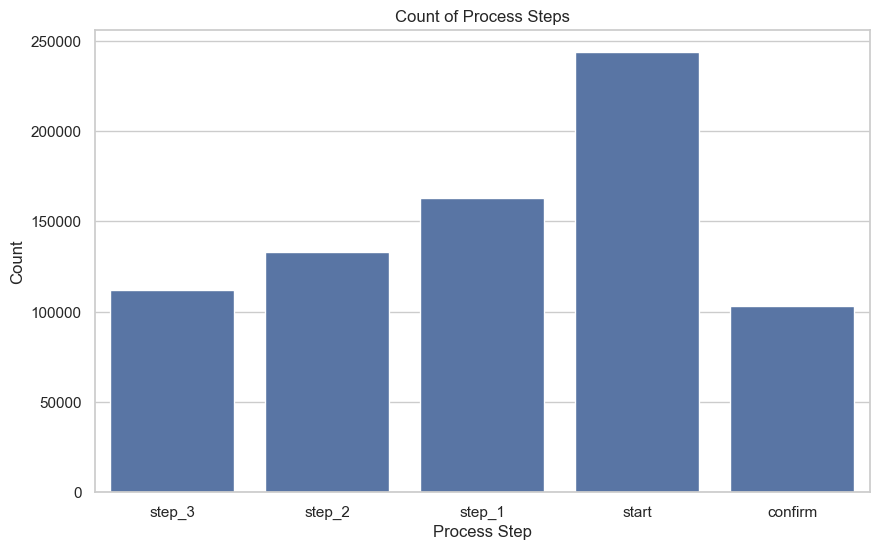

In [19]:

# Assuming df_merge is your DataFrame
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Replace 'count' with the actual column name in your DataFrame
sns.countplot(x="process_step", data=df_merge)

plt.title('Count of Process Steps')
plt.xlabel('Process Step')
plt.ylabel('Count')

plt.show()






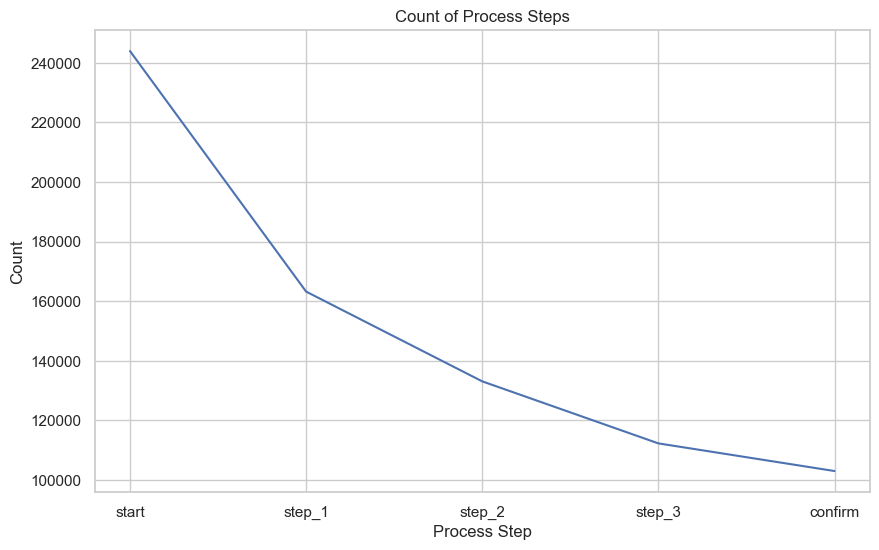

In [20]:

# Assuming df_merge is your DataFrame
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Replace 'count' with the actual column name in your DataFrame
sns.lineplot(x=df_merge["process_step"].value_counts().index, y=df_merge["process_step"].value_counts().values)

plt.title('Count of Process Steps')
plt.xlabel('Process Step')
plt.ylabel('Count')

plt.show()


In [ ]:
# Big drop between start and step_1

In [26]:
df_merge['client_id'].nunique()

120157

In [27]:
df_final_demo

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


In [28]:
df_final_experiment_clients

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


In [29]:
df1_4 = pd.merge(df_final_demo, df_final_experiment_clients, on='client_id', how='left')


In [37]:
df1_4

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Test
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control
...,...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0,NaN
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0,NaN
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0,NaN
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0,NaN


In [34]:
df1_4['gendr'].value_counts()

gendr
U    24122
M    23724
F    22746
X        3
Name: count, dtype: int64

In [36]:
df1_4.dtypes

client_id             int64
clnt_tenure_yr      float64
clnt_tenure_mnth    float64
clnt_age            float64
gendr                object
num_accts           float64
bal                 float64
calls_6_mnth        float64
logons_6_mnth       float64
Variation            object
dtype: object

In [42]:
df1_4

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Test
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control
...,...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0,NaN
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0,NaN
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0,NaN
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0,NaN


In [44]:
df1_4['logons_6_mnth'].value_counts()

logons_6_mnth
9.0    12350
3.0    10243
4.0    10220
7.0     9893
5.0     9254
6.0     7878
8.0     4810
2.0     3009
1.0     2938
Name: count, dtype: int64

<Axes: ylabel='bal'>

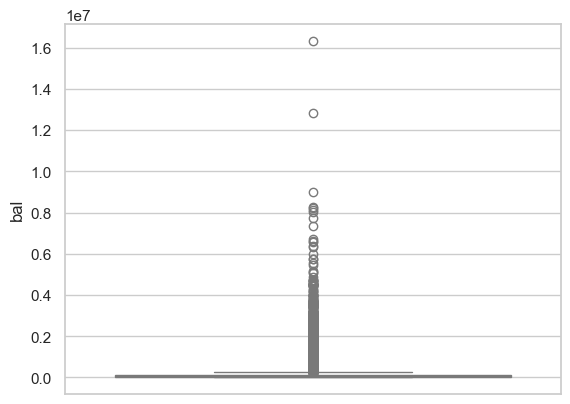

In [45]:
sns.boxplot(data = df1_4['bal'], color="lightblue")

In [47]:
df1_4['bal'] == 0



0        False
1        False
2        False
3        False
4        False
         ...  
70604    False
70605    False
70606    False
70607    False
70608    False
Name: bal, Length: 70609, dtype: bool

In [48]:
df_final_demo

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


(0.0, 250000.0)

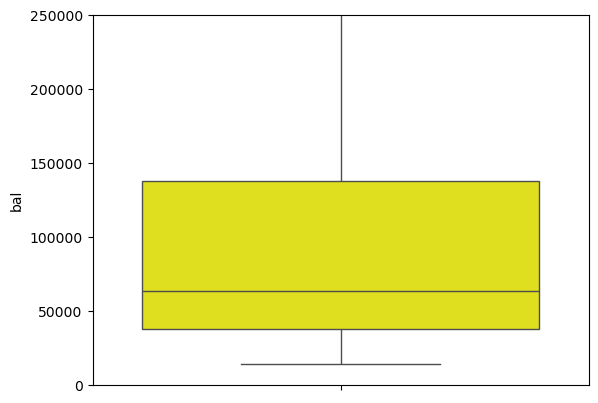

In [13]:
sns.boxplot(data = df_final_demo['bal'], color="yellow")
plt.ylim(0, 250,000)

In [ ]:
df_final_demo['bal'].quantile([0.25, 0.5, 0.75])